# How Does a Bike-Share Navigate Speedy Success?
### By: Mamdouh Ali Hamza

Cyclistic is bike-share company in Chicago. The director of marketing believes the company’s future success depends on maximizing the number of annual memberships. Therefore, It is important to understand how casual riders and annual members use Cyclistic bikes differently. From these insights, Cyclistic marketing analytics team will design a new marketing strategy to convert casual riders into annual members. But first, Cyclistic executives must approve the recommendations, so they must be backed up with compelling data insights and professional data visualizations.

In [1]:
library(tidyverse)  
library(lubridate)
library(dplyr) 
library(ggplot2)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
# Read the trip data from 2021-04 to 2022-03 (12 months)
tripdata_2021_04 <- read.csv("/kaggle/input/cyclistic-bike-share/202104-divvy-tripdata.csv")
tripdata_2021_05 <- read.csv("/kaggle/input/cyclistic-bike-share/202105-divvy-tripdata.csv")
tripdata_2021_06 <- read.csv("/kaggle/input/cyclistic-bike-share/202106-divvy-tripdata.csv")
tripdata_2021_07 <- read.csv("/kaggle/input/cyclistic-bike-share/202107-divvy-tripdata.csv")
tripdata_2021_08 <- read.csv("/kaggle/input/cyclistic-bike-share/202108-divvy-tripdata.csv")
tripdata_2021_09 <- read.csv("/kaggle/input/cyclistic-bike-share/202109-divvy-tripdata.csv")
tripdata_2021_10 <- read.csv("/kaggle/input/cyclistic-bike-share/202110-divvy-tripdata.csv")
tripdata_2021_11 <- read.csv("/kaggle/input/cyclistic-bike-share/202111-divvy-tripdata.csv")
tripdata_2021_12 <- read.csv("/kaggle/input/cyclistic-bike-share/202112-divvy-tripdata.csv")
tripdata_2022_01 <- read.csv("/kaggle/input/cyclistic-bike-share/202201-divvy-tripdata.csv")
tripdata_2022_02 <- read.csv("/kaggle/input/cyclistic-bike-share/202202-divvy-tripdata.csv")
tripdata_2022_03 <- read.csv("/kaggle/input/cyclistic-bike-share/202203-divvy-tripdata.csv")

In [3]:
colnames(tripdata_2021_04)
colnames(tripdata_2021_05)
colnames(tripdata_2021_06)
colnames(tripdata_2021_07)
colnames(tripdata_2021_08)
colnames(tripdata_2021_09)
colnames(tripdata_2021_10)
colnames(tripdata_2021_11)
colnames(tripdata_2021_12)
colnames(tripdata_2022_01)
colnames(tripdata_2022_02)
colnames(tripdata_2022_03)

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

In [4]:
str(tripdata_2021_04)
str(tripdata_2021_05)
str(tripdata_2021_06)
str(tripdata_2021_07)
str(tripdata_2021_08)
str(tripdata_2021_09)
str(tripdata_2021_10)
str(tripdata_2021_11)
str(tripdata_2021_12)
str(tripdata_2022_01)
str(tripdata_2022_02)
str(tripdata_2022_03)

'data.frame':	337230 obs. of  13 variables:
 $ ride_id           : chr  "6C992BD37A98A63F" "1E0145613A209000" "E498E15508A80BAD" "1887262AD101C604" ...
 $ rideable_type     : chr  "classic_bike" "docked_bike" "docked_bike" "classic_bike" ...
 $ started_at        : chr  "2021-04-12 18:25:36" "2021-04-27 17:27:11" "2021-04-03 12:42:45" "2021-04-17 09:17:42" ...
 $ ended_at          : chr  "2021-04-12 18:56:55" "2021-04-27 18:31:29" "2021-04-07 11:40:24" "2021-04-17 09:42:48" ...
 $ start_station_name: chr  "State St & Pearson St" "Dorchester Ave & 49th St" "Loomis Blvd & 84th St" "Honore St & Division St" ...
 $ start_station_id  : chr  "TA1307000061" "KA1503000069" "20121" "TA1305000034" ...
 $ end_station_name  : chr  "Southport Ave & Waveland Ave" "Dorchester Ave & 49th St" "Loomis Blvd & 84th St" "Southport Ave & Waveland Ave" ...
 $ end_station_id    : chr  "13235" "KA1503000069" "20121" "13235" ...
 $ start_lat         : num  41.9 41.8 41.7 41.9 41.7 ...
 $ start_lng         : num 

In [5]:
##Combine all the data sets
all_trips <- bind_rows(tripdata_2021_04, tripdata_2021_05, tripdata_2021_06, tripdata_2021_07, tripdata_2021_08, tripdata_2021_09, tripdata_2021_10, tripdata_2021_11, tripdata_2021_12, tripdata_2022_01, tripdata_2022_02, tripdata_2022_03)
head(all_trips)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,6C992BD37A98A63F,classic_bike,2021-04-12 18:25:36,2021-04-12 18:56:55,State St & Pearson St,TA1307000061,Southport Ave & Waveland Ave,13235,41.89745,-87.62872,41.94815,-87.66394,member
2,1E0145613A209000,docked_bike,2021-04-27 17:27:11,2021-04-27 18:31:29,Dorchester Ave & 49th St,KA1503000069,Dorchester Ave & 49th St,KA1503000069,41.80577,-87.59246,41.80577,-87.59246,casual
3,E498E15508A80BAD,docked_bike,2021-04-03 12:42:45,2021-04-07 11:40:24,Loomis Blvd & 84th St,20121,Loomis Blvd & 84th St,20121,41.74149,-87.65841,41.74149,-87.65841,casual
4,1887262AD101C604,classic_bike,2021-04-17 09:17:42,2021-04-17 09:42:48,Honore St & Division St,TA1305000034,Southport Ave & Waveland Ave,13235,41.90312,-87.67394,41.94815,-87.66394,member
5,C123548CAB2A32A5,docked_bike,2021-04-03 12:42:25,2021-04-03 14:13:42,Loomis Blvd & 84th St,20121,Loomis Blvd & 84th St,20121,41.74149,-87.65841,41.74149,-87.65841,casual
6,097E76F3651B1AC1,classic_bike,2021-04-25 18:43:18,2021-04-25 18:43:59,Clinton St & Polk St,15542,Clinton St & Polk St,15542,41.87147,-87.64095,41.87147,-87.64095,casual


In [6]:
str(all_trips)

'data.frame':	5723532 obs. of  13 variables:
 $ ride_id           : chr  "6C992BD37A98A63F" "1E0145613A209000" "E498E15508A80BAD" "1887262AD101C604" ...
 $ rideable_type     : chr  "classic_bike" "docked_bike" "docked_bike" "classic_bike" ...
 $ started_at        : chr  "2021-04-12 18:25:36" "2021-04-27 17:27:11" "2021-04-03 12:42:45" "2021-04-17 09:17:42" ...
 $ ended_at          : chr  "2021-04-12 18:56:55" "2021-04-27 18:31:29" "2021-04-07 11:40:24" "2021-04-17 09:42:48" ...
 $ start_station_name: chr  "State St & Pearson St" "Dorchester Ave & 49th St" "Loomis Blvd & 84th St" "Honore St & Division St" ...
 $ start_station_id  : chr  "TA1307000061" "KA1503000069" "20121" "TA1305000034" ...
 $ end_station_name  : chr  "Southport Ave & Waveland Ave" "Dorchester Ave & 49th St" "Loomis Blvd & 84th St" "Southport Ave & Waveland Ave" ...
 $ end_station_id    : chr  "13235" "KA1503000069" "20121" "13235" ...
 $ start_lat         : num  41.9 41.8 41.7 41.9 41.7 ...
 $ start_lng         : num

In [7]:
all_trips_2 <- subset(all_trips, select = c( ride_id, rideable_type, started_at, ended_at, start_station_name, end_station_name, member_casual))
head(all_trips_2)
str(all_trips_2)

,ride_id,rideable_type,started_at,ended_at,start_station_name,end_station_name,member_casual
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,6C992BD37A98A63F,classic_bike,2021-04-12 18:25:36,2021-04-12 18:56:55,State St & Pearson St,Southport Ave & Waveland Ave,member
2,1E0145613A209000,docked_bike,2021-04-27 17:27:11,2021-04-27 18:31:29,Dorchester Ave & 49th St,Dorchester Ave & 49th St,casual
3,E498E15508A80BAD,docked_bike,2021-04-03 12:42:45,2021-04-07 11:40:24,Loomis Blvd & 84th St,Loomis Blvd & 84th St,casual
4,1887262AD101C604,classic_bike,2021-04-17 09:17:42,2021-04-17 09:42:48,Honore St & Division St,Southport Ave & Waveland Ave,member
5,C123548CAB2A32A5,docked_bike,2021-04-03 12:42:25,2021-04-03 14:13:42,Loomis Blvd & 84th St,Loomis Blvd & 84th St,casual
6,097E76F3651B1AC1,classic_bike,2021-04-25 18:43:18,2021-04-25 18:43:59,Clinton St & Polk St,Clinton St & Polk St,casual


'data.frame':	5723532 obs. of  7 variables:
 $ ride_id           : chr  "6C992BD37A98A63F" "1E0145613A209000" "E498E15508A80BAD" "1887262AD101C604" ...
 $ rideable_type     : chr  "classic_bike" "docked_bike" "docked_bike" "classic_bike" ...
 $ started_at        : chr  "2021-04-12 18:25:36" "2021-04-27 17:27:11" "2021-04-03 12:42:45" "2021-04-17 09:17:42" ...
 $ ended_at          : chr  "2021-04-12 18:56:55" "2021-04-27 18:31:29" "2021-04-07 11:40:24" "2021-04-17 09:42:48" ...
 $ start_station_name: chr  "State St & Pearson St" "Dorchester Ave & 49th St" "Loomis Blvd & 84th St" "Honore St & Division St" ...
 $ end_station_name  : chr  "Southport Ave & Waveland Ave" "Dorchester Ave & 49th St" "Loomis Blvd & 84th St" "Southport Ave & Waveland Ave" ...
 $ member_casual     : chr  "member" "casual" "casual" "member" ...


In [8]:
all_trips_2$date <- as.Date(all_trips_2$started_at) 

all_trips_2$month <- format(as.Date(all_trips_2$date), "%m")
all_trips_2$day <- format(as.Date(all_trips_2$date), "%d")
all_trips_2$year <- format(as.Date(all_trips_2$date), "%Y")
all_trips_2$day_of_week <- format(as.Date(all_trips_2$date), "%A")

all_trips_2$ride_length <- difftime(all_trips_2$ended_at, all_trips_2$started_at, units='mins')

In [9]:
head(all_trips_2)
str(all_trips_2)

,ride_id,rideable_type,started_at,ended_at,start_station_name,end_station_name,member_casual,date,month,day,year,day_of_week,ride_length
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<date>,<chr>,<chr>,<chr>,<chr>,<drtn>
1,6C992BD37A98A63F,classic_bike,2021-04-12 18:25:36,2021-04-12 18:56:55,State St & Pearson St,Southport Ave & Waveland Ave,member,2021-04-12,04,12,2021,Monday,31.3166667 mins
2,1E0145613A209000,docked_bike,2021-04-27 17:27:11,2021-04-27 18:31:29,Dorchester Ave & 49th St,Dorchester Ave & 49th St,casual,2021-04-27,04,27,2021,Tuesday,64.3000000 mins
3,E498E15508A80BAD,docked_bike,2021-04-03 12:42:45,2021-04-07 11:40:24,Loomis Blvd & 84th St,Loomis Blvd & 84th St,casual,2021-04-03,04,03,2021,Saturday,5697.6500000 mins
4,1887262AD101C604,classic_bike,2021-04-17 09:17:42,2021-04-17 09:42:48,Honore St & Division St,Southport Ave & Waveland Ave,member,2021-04-17,04,17,2021,Saturday,25.1000000 mins
5,C123548CAB2A32A5,docked_bike,2021-04-03 12:42:25,2021-04-03 14:13:42,Loomis Blvd & 84th St,Loomis Blvd & 84th St,casual,2021-04-03,04,03,2021,Saturday,91.2833333 mins
6,097E76F3651B1AC1,classic_bike,2021-04-25 18:43:18,2021-04-25 18:43:59,Clinton St & Polk St,Clinton St & Polk St,casual,2021-04-25,04,25,2021,Sunday,0.6833333 mins


'data.frame':	5723532 obs. of  13 variables:
 $ ride_id           : chr  "6C992BD37A98A63F" "1E0145613A209000" "E498E15508A80BAD" "1887262AD101C604" ...
 $ rideable_type     : chr  "classic_bike" "docked_bike" "docked_bike" "classic_bike" ...
 $ started_at        : chr  "2021-04-12 18:25:36" "2021-04-27 17:27:11" "2021-04-03 12:42:45" "2021-04-17 09:17:42" ...
 $ ended_at          : chr  "2021-04-12 18:56:55" "2021-04-27 18:31:29" "2021-04-07 11:40:24" "2021-04-17 09:42:48" ...
 $ start_station_name: chr  "State St & Pearson St" "Dorchester Ave & 49th St" "Loomis Blvd & 84th St" "Honore St & Division St" ...
 $ end_station_name  : chr  "Southport Ave & Waveland Ave" "Dorchester Ave & 49th St" "Loomis Blvd & 84th St" "Southport Ave & Waveland Ave" ...
 $ member_casual     : chr  "member" "casual" "casual" "member" ...
 $ date              : Date, format: "2021-04-12" "2021-04-27" ...
 $ month             : chr  "04" "04" "04" "04" ...
 $ day               : chr  "12" "27" "03" "17" ...


In [10]:
all_trips_2 <- drop_na(all_trips_2)
head(all_trips_2)
str(all_trips_2)

,ride_id,rideable_type,started_at,ended_at,start_station_name,end_station_name,member_casual,date,month,day,year,day_of_week,ride_length
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<date>,<chr>,<chr>,<chr>,<chr>,<drtn>
1,6C992BD37A98A63F,classic_bike,2021-04-12 18:25:36,2021-04-12 18:56:55,State St & Pearson St,Southport Ave & Waveland Ave,member,2021-04-12,04,12,2021,Monday,31.3166667 mins
2,1E0145613A209000,docked_bike,2021-04-27 17:27:11,2021-04-27 18:31:29,Dorchester Ave & 49th St,Dorchester Ave & 49th St,casual,2021-04-27,04,27,2021,Tuesday,64.3000000 mins
3,E498E15508A80BAD,docked_bike,2021-04-03 12:42:45,2021-04-07 11:40:24,Loomis Blvd & 84th St,Loomis Blvd & 84th St,casual,2021-04-03,04,03,2021,Saturday,5697.6500000 mins
4,1887262AD101C604,classic_bike,2021-04-17 09:17:42,2021-04-17 09:42:48,Honore St & Division St,Southport Ave & Waveland Ave,member,2021-04-17,04,17,2021,Saturday,25.1000000 mins
5,C123548CAB2A32A5,docked_bike,2021-04-03 12:42:25,2021-04-03 14:13:42,Loomis Blvd & 84th St,Loomis Blvd & 84th St,casual,2021-04-03,04,03,2021,Saturday,91.2833333 mins
6,097E76F3651B1AC1,classic_bike,2021-04-25 18:43:18,2021-04-25 18:43:59,Clinton St & Polk St,Clinton St & Polk St,casual,2021-04-25,04,25,2021,Sunday,0.6833333 mins


'data.frame':	5723532 obs. of  13 variables:
 $ ride_id           : chr  "6C992BD37A98A63F" "1E0145613A209000" "E498E15508A80BAD" "1887262AD101C604" ...
 $ rideable_type     : chr  "classic_bike" "docked_bike" "docked_bike" "classic_bike" ...
 $ started_at        : chr  "2021-04-12 18:25:36" "2021-04-27 17:27:11" "2021-04-03 12:42:45" "2021-04-17 09:17:42" ...
 $ ended_at          : chr  "2021-04-12 18:56:55" "2021-04-27 18:31:29" "2021-04-07 11:40:24" "2021-04-17 09:42:48" ...
 $ start_station_name: chr  "State St & Pearson St" "Dorchester Ave & 49th St" "Loomis Blvd & 84th St" "Honore St & Division St" ...
 $ end_station_name  : chr  "Southport Ave & Waveland Ave" "Dorchester Ave & 49th St" "Loomis Blvd & 84th St" "Southport Ave & Waveland Ave" ...
 $ member_casual     : chr  "member" "casual" "casual" "member" ...
 $ date              : Date, format: "2021-04-12" "2021-04-27" ...
 $ month             : chr  "04" "04" "04" "04" ...
 $ day               : chr  "12" "27" "03" "17" ...


In [11]:
summary(all_trips_2)

   ride_id          rideable_type       started_at          ended_at        
 Length:5723532     Length:5723532     Length:5723532     Length:5723532    
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
 start_station_name end_station_name   member_casual           date           
 Length:5723532     Length:5723532     Length:5723532     Min.   :2021-04-01  
 Class :character   Class :character   Class :character   1st Qu.:2021-06-22  
 Mode  :character   Mode  :character   Mode  :character   Median :2021-08-17  
                                                          Mean   :2021-08-26  
                                                          3rd Qu.:

In [12]:
all_trips_2 %>%
    group_by(member_casual) %>%
    summarize(number_of_rides = n() , .groups = 'drop')

member_casual,number_of_rides
<chr>,<int>
casual,2546542
member,3176990


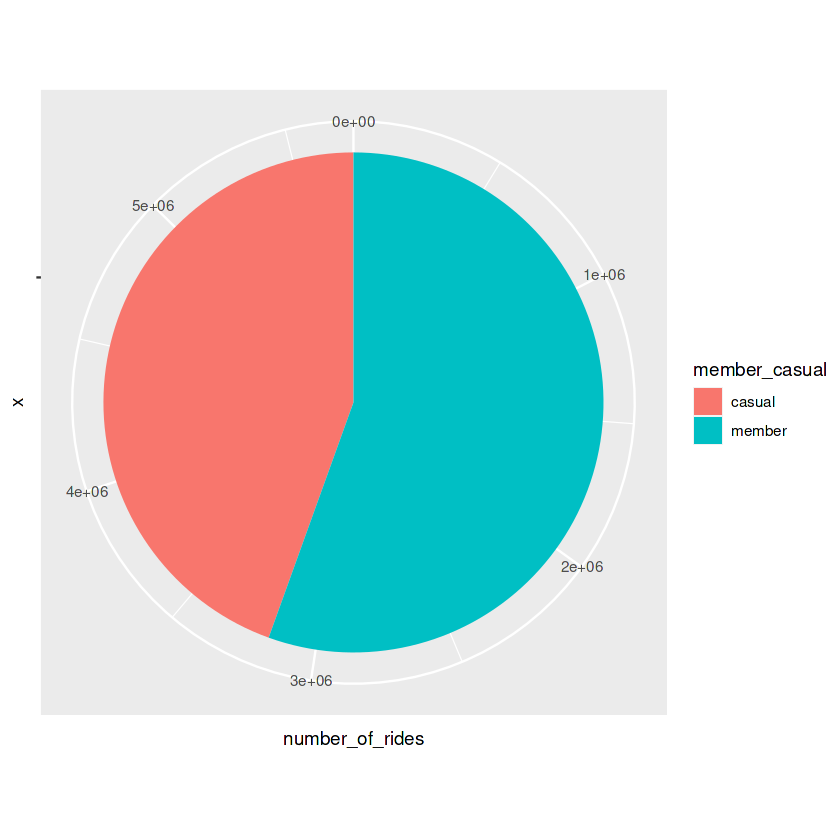

In [13]:
all_trips_2 %>%
    group_by(member_casual) %>%
    summarize(number_of_rides = n() , .groups = 'drop') %>%
    ggplot(aes(x="", y=number_of_rides, fill=member_casual)) +
    geom_bar(stat="identity", width=1) +
    coord_polar("y", start=0)

In [14]:
all_trips_2 %>%
    group_by(member_casual, day_of_week) %>%
    summarise(number_of_ride = n(), .groups = 'drop')

member_casual,day_of_week,number_of_ride
<chr>,<chr>,<int>
casual,Friday,364282
casual,Monday,292996
casual,Saturday,550015
casual,Sunday,482840
casual,Thursday,293632
casual,Tuesday,276375
casual,Wednesday,286402
member,Friday,453113
member,Monday,439435


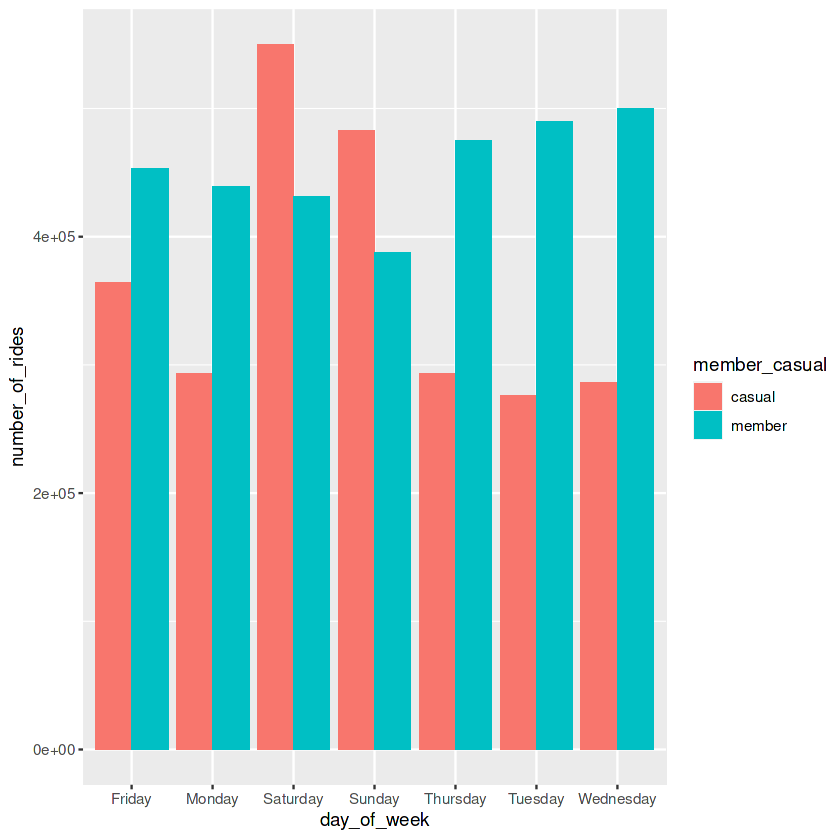

In [15]:
all_trips_2 %>%
    group_by(member_casual, day_of_week) %>%
    summarise(number_of_rides = n(), .groups = 'drop') %>%
    ggplot(aes(x = day_of_week, y = number_of_rides, fill = member_casual)) + 
    geom_bar(position = "dodge", stat = "identity")

## More casual users in weekends and more member users in weekdays.

In [16]:
all_trips_2 %>%
    group_by(member_casual, month) %>%
    summarise(number_of_ride = n(), .groups = 'drop')

member_casual,month,number_of_ride
<chr>,<chr>,<int>
casual,01,18520
casual,02,21416
casual,03,89882
casual,04,136601
casual,05,256916
casual,06,370681
casual,07,442056
casual,08,412671
casual,09,363890


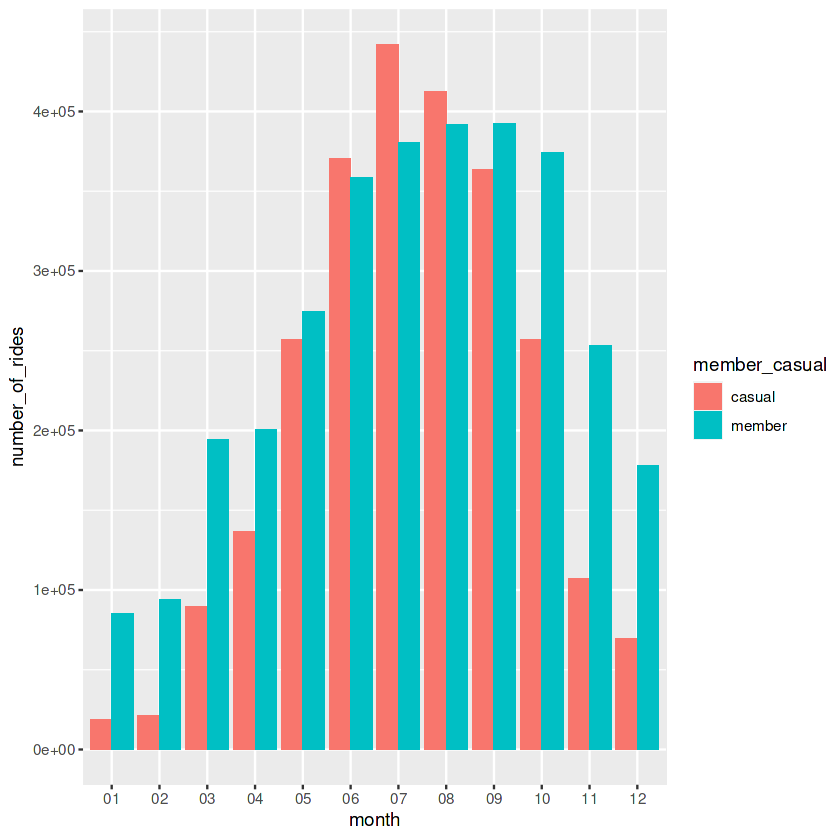

In [17]:
all_trips_2 %>%
    group_by(member_casual, month) %>%
    summarise(number_of_rides = n(), .groups = 'drop') %>%
    ggplot(aes(x = month, y = number_of_rides, fill = member_casual)) + 
    geom_bar(position = "dodge", stat = "identity")

## More trips in summer months.

In [18]:
all_trips_2 %>%
    group_by(member_casual, day_of_week) %>%
    summarise(length_of_ride = mean(ride_length), .groups = 'drop')

member_casual,day_of_week,length_of_ride
<chr>,<chr>,<drtn>
casual,Friday,30.10318 mins
casual,Monday,31.48217 mins
casual,Saturday,34.28071 mins
casual,Sunday,37.40118 mins
casual,Thursday,27.88128 mins
casual,Tuesday,27.43475 mins
casual,Wednesday,27.76578 mins
member,Friday,13.13944 mins
member,Monday,12.96837 mins


Don't know how to automatically pick scale for object of type <difftime>.
Defaulting to continuous.


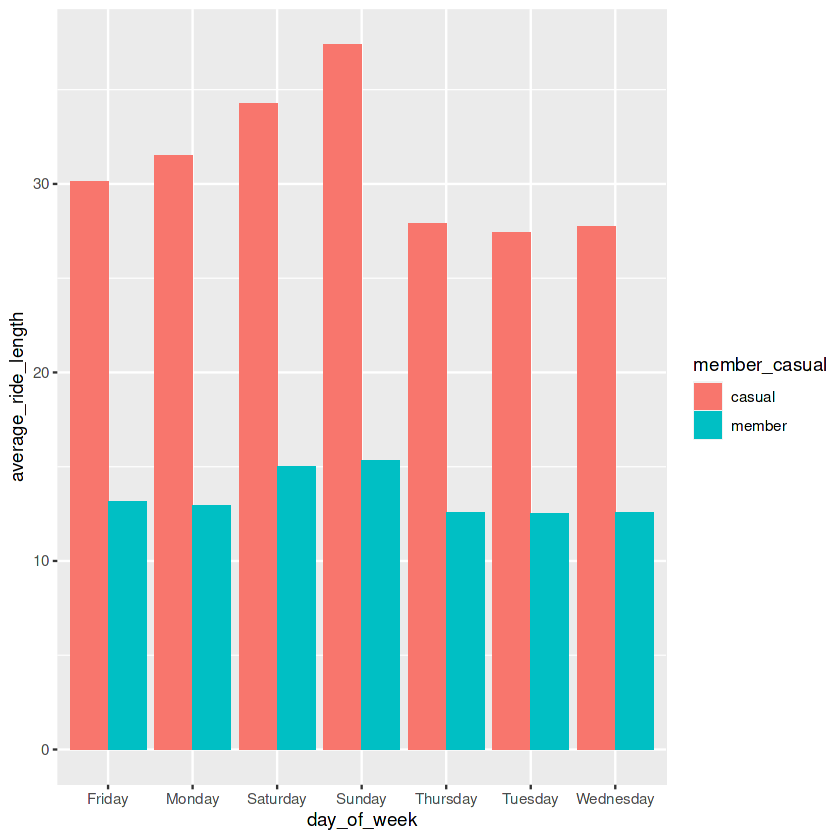

In [19]:
all_trips_2 %>%
    group_by(member_casual, day_of_week) %>%
    summarise(average_ride_length = mean(ride_length), .groups = 'drop') %>%
    ggplot(aes(x = day_of_week, y = average_ride_length, fill = member_casual)) + 
    geom_bar(position = "dodge", stat = "identity")

In [20]:
all_trips_2 %>%
    group_by(member_casual, month) %>%
    summarise(length_of_ride = mean(ride_length), .groups = 'drop')

member_casual,month,length_of_ride
<chr>,<chr>,<drtn>
casual,01,30.37746 mins
casual,02,26.70845 mins
casual,03,32.62239 mins
casual,04,38.02299 mins
casual,05,38.23097 mins
casual,06,37.12143 mins
casual,07,32.79017 mins
casual,08,28.78637 mins
casual,09,27.81499 mins


Don't know how to automatically pick scale for object of type <difftime>.
Defaulting to continuous.


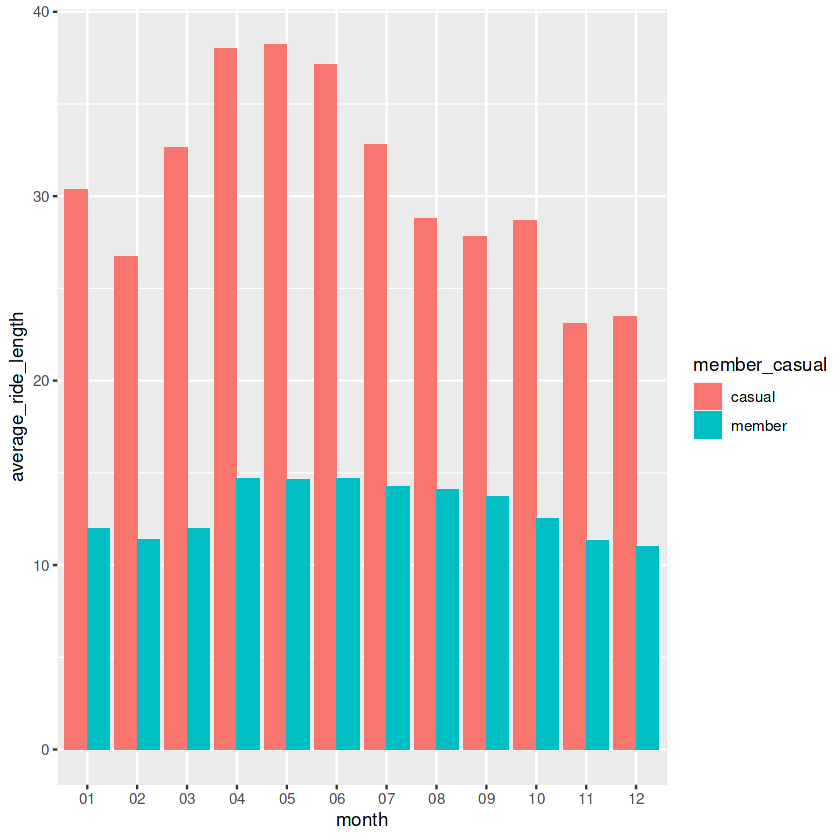

In [21]:
all_trips_2 %>%
    group_by(member_casual, month) %>%
    summarise(average_ride_length = mean(ride_length), .groups = 'drop') %>%
    ggplot(aes(x = month, y = average_ride_length, fill = member_casual)) + 
    geom_bar(position = "dodge", stat = "identity")

## Trips of casual users is always longer than member users.

# Conclusion
## Casual users make tourism rides usually in weekends. But member users make programatic rides in weekday.